# Principal Component Analysis (PCA)
- Practice

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing 
import matplotlib.pyplot as plt

In [2]:
genes = ['gene' +  str(i) for i in range(1,101)]

In [4]:
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

In [5]:
data = pd.DataFrame(columns=[*wt,*ko],index=genes)

In [7]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000),size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000),size=5)

In [8]:
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,911,863,893,860,884,390,378,341,358,395
gene2,757,800,781,712,705,799,826,833,849,838
gene3,388,370,360,371,361,417,435,407,482,418
gene4,862,811,862,897,850,903,857,867,885,872
gene5,795,829,818,822,832,340,346,348,353,357
...,...,...,...,...,...,...,...,...,...,...
gene96,27,19,15,22,20,387,371,371,352,377
gene97,426,442,410,465,461,990,902,955,926,905
gene98,345,331,325,321,342,150,145,148,153,154
gene99,55,54,52,61,47,457,473,427,469,436


In [12]:
# center and scale the data
scaled_data = preprocessing.scale(data.T)
# stand_data = preprocessing.StandardScaler().fit_transform(data)

In [17]:
# PCA

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [22]:
pca.explained_variance_,pca.explained_variance_ratio_

(array([9.86357575e+01, 3.06499796e+00, 2.13522363e+00, 1.94316274e+00,
        1.56016055e+00, 1.15379253e+00, 1.02093028e+00, 9.38895527e-01,
        6.58190411e-01, 4.64938006e-31]),
 array([8.87721817e-01, 2.75849816e-02, 1.92170127e-02, 1.74884647e-02,
        1.40414449e-02, 1.03841328e-02, 9.18837250e-03, 8.45005974e-03,
        5.92371370e-03, 4.18444205e-33]))

In [23]:
# percentage of variation
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1) # Round the values
labels = ['PC' +str(x) for x in range(1,len(per_var)+1)]  # Creating the PC names for each feature

Text(0.5, 1.0, 'Scree Plot')

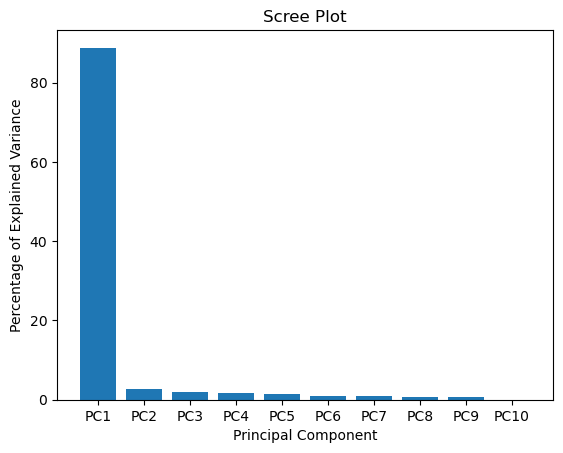

In [27]:
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')

In [29]:
pca_df = pd.DataFrame(pca_data,index=[*wt,*ko],columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-9.573708,2.255970,2.967464,-1.024016,-0.203275,-0.231757,0.071358,-0.427678,-0.614500,2.407985e-16
wt2,-9.686282,-2.492777,-0.075348,-0.972042,2.100265,-0.409720,-1.077730,-0.507126,0.404053,9.897835e-16
wt3,-9.536805,1.109302,-2.869414,-1.685539,-1.037849,-0.140887,0.725104,-0.468902,-0.031730,1.082611e-16
wt4,-9.092826,0.030562,-0.817862,2.844970,-0.483171,0.339140,-1.001885,0.077172,-1.008103,7.676021e-16
wt5,-9.203971,-0.876194,0.777652,0.881372,-0.413345,0.526387,1.245128,1.398016,1.245749,1.625825e-15
ko1,9.012941,0.286665,0.212736,1.393250,-0.599174,-1.809735,0.178385,-1.321369,0.914259,-6.586823e-17
ko2,9.254018,-0.009219,-0.328994,0.475922,2.018596,0.261960,1.771444,-0.081351,-0.929471,1.171241e-15
ko3,9.457398,-2.523453,0.418098,-1.150862,-1.527213,-0.839547,-0.230201,1.010765,-0.853298,-1.892526e-16
ko4,9.647922,-0.529036,0.372416,-0.378371,-0.743172,2.386467,-0.450184,-1.065339,0.388180,9.006969e-16
ko5,9.721313,2.748179,-0.656749,-0.384684,0.888339,-0.082307,-1.231419,1.385812,0.484860,-1.484228e-15


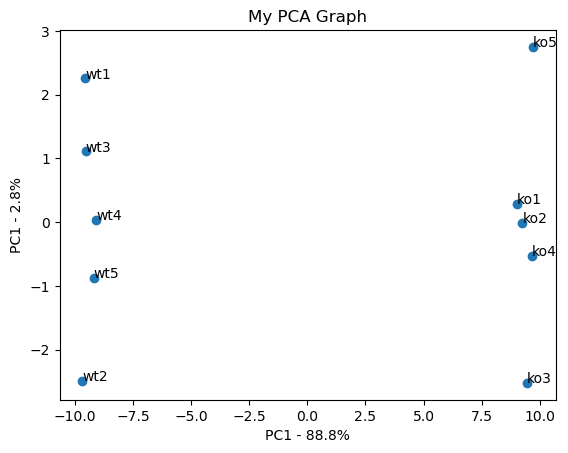

In [32]:
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC1 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))

##### The **wt** samples clustered on the left side, suggesting that they are correlated with each other,
##### The **ko** samples clustered on the right side, suggesting that they are correlated with each other,
##### The Separation of the two clusters along the x-axis suggests that 'wt' samples are very different from 'ko' samples

In [33]:
pca.components_[0]

array([-0.10584457,  0.08473045,  0.08913501,  0.04444189, -0.10594245,
        0.09553062, -0.10594653,  0.03007746, -0.10091369, -0.10268589,
        0.10379092, -0.10518392,  0.08725917,  0.1054593 ,  0.10525478,
        0.10571588,  0.09263898,  0.07372944,  0.1050178 ,  0.10567186,
       -0.10402447,  0.10295326,  0.10561152, -0.09399426,  0.10518147,
       -0.10590676,  0.10519909,  0.03968848,  0.10592944,  0.09449173,
       -0.10313885, -0.10585393,  0.10595896, -0.10604429, -0.10565258,
       -0.10603693,  0.10584825, -0.10604387,  0.09085352,  0.1056181 ,
       -0.10576663, -0.10497598, -0.1057573 , -0.10502516,  0.10605504,
        0.10086156,  0.10592153,  0.10359309, -0.10404056, -0.09428215,
        0.10608368, -0.10570012, -0.10600595, -0.02663343, -0.10502633,
        0.09809767,  0.10273891, -0.10485006,  0.10467252,  0.10495093,
       -0.10578256,  0.10598289, -0.10144531, -0.03631464,  0.10587492,
        0.10562072,  0.09500842, -0.10479615,  0.06512091, -0.10

_____

# Another Practice Example on real DATA

In [34]:
from sklearn.datasets import load_breast_cancer

In [37]:
cancer = load_breast_cancer()

In [38]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [40]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [41]:
# Creating the dataframe
df = pd.DataFrame(cancer['data'],columns = cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
df.shape

(569, 30)

In [43]:
scaler = preprocessing.StandardScaler()
scaler.fit(df)

StandardScaler()

In [44]:
scaled_data = scaler.transform(df,copy=True)

In [45]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [46]:
# now Appling the PCA 
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [47]:
pca_df = pca.transform(scaled_data)

In [50]:
pca_df.shape

(569, 2)

Text(0, 0.5, 'PC2')

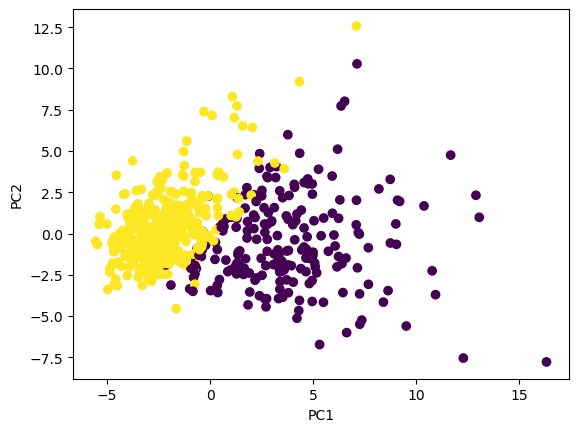

In [51]:
plt.scatter(pca_df[:,0],pca_df[:,1],c=cancer['target'])
plt.xlabel('PC1')
plt.ylabel('PC2')